In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os 
import random
import sys
import time
from time import localtime, strftime
  
import numpy as np
import tensorflow as tf
  
import cv2
  
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import keras


from keras.models import Model
from keras.layers import Input

from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.utils import plot_model
 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import layers
from keras import models
from keras import optimizers
 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
  
from sklearn.preprocessing import LabelEncoder  # class가 문자열인경우 변환
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋을 나눔
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증
 
 
 
# 기본 제공 데이터 
from keras.datasets import mnist
from keras.datasets import cifar10
 

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정
 
# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  
 
LOG_DIR = '../../logs' # 폴더명만 지정하면 자동으로 생성됨.
 
# tensorboard --logdir=C:/ai_201904/ws_python/notebook/logs 
# graph = tf.get_default_graph()
# with tf.summary.FileWriter(LOG_DIR) as writer:
#     writer.add_graph(graph)
 


Using TensorFlow backend.


In [6]:
# 랜덤시드 고정시키기
np.random.seed(3)

# 1. 데이터 생성하기, ./train 폴더안의 폴더의 수는 classes수에 대응함.
# 픽셀 값이 0 ~ 255는 너무 큼으로 0~1 범위로 변환
train_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
        './train',
        target_size=(64, 64), # 64 x 64 픽셀로 줄임
        batch_size=2,         # 2건씩 처리
        class_mode='categorical')  # 다중 분류

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        './validation',
        target_size=(64, 64),    
        batch_size=1,
        class_mode='categorical')
   

Found 248 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


### CNN Conv넷

In [8]:
num_classes = 6  # 배우는 5명
im_rows = 64
im_cols = 64
in_shape = (im_rows, im_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=in_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 50% 삭제
model.add(Dropout(0.25)) # 25% 삭제

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 50% 삭제
model.add(Dropout(0.25)) # 25% 삭제

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25)) # 25% 삭제
model.add(Dense(num_classes, activation = 'softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit_generator(
       train_generator,
       epochs=15,
       validation_data=validation_generator)
 

Epoch 1/15
124/124 [==============================] - 3s 25ms/step - loss: 1.7714 - acc: 0.3065 - val_loss: 1.7446 - val_acc: 0.1667
Epoch 2/15
124/124 [==============================] - 2s 18ms/step - loss: 1.5251 - acc: 0.3750 - val_loss: 1.4640 - val_acc: 0.3333
Epoch 3/15
124/124 [==============================] - 2s 17ms/step - loss: 1.2935 - acc: 0.4960 - val_loss: 1.2023 - val_acc: 0.6167
Epoch 4/15
124/124 [==============================] - 2s 17ms/step - loss: 1.0040 - acc: 0.6573 - val_loss: 1.0222 - val_acc: 0.6167
Epoch 5/15
124/124 [==============================] - 2s 17ms/step - loss: 0.9028 - acc: 0.6935 - val_loss: 0.9462 - val_acc: 0.6667
Epoch 6/15
124/124 [==============================] - 2s 17ms/step - loss: 0.6300 - acc: 0.7742 - val_loss: 0.6829 - val_acc: 0.6833
Epoch 7/15
124/124 [==============================] - 2s 18ms/step - loss: 0.5779 - acc: 0.7903 - val_loss: 0.6904 - val_acc: 0.7667
Epoch 8/15
124/124 [==============================] - 2s 17ms/step - 

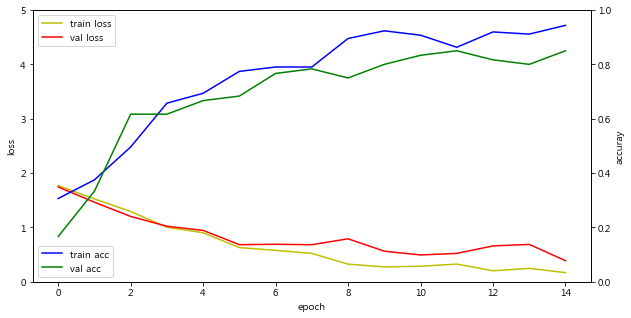

In [9]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)      # 챠트 크기 설정

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 5.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
 

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
__________

In [11]:
# 총 50개의 검증 샘플이있고 배치사이즈가 2임으로 25로 지정 
scores = model.evaluate_generator(validation_generator, steps=25)  
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

acc: 88.00%


In [12]:
model.save('./actor.h5')